In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

In [5]:
df = pd.read_excel(r"C:\Users\Me\Desktop\LabFinals\Labs\Lab10\Online Retail.xlsx")
df.columns

df = df.dropna(subset=['CustomerID'])

df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [6]:
df['TotalSpent'] = df['Quantity'] * df['UnitPrice']
customer_data = df.groupby('CustomerID').agg({
    'TotalSpent': 'sum',
    'Quantity': 'sum'  
}).reset_index()

customer_data.rename(columns={'Quantity': 'ItemsPurchased'}, inplace=True)

print("Aggregated Customer Data:")
print(customer_data.head())

Aggregated Customer Data:
   CustomerID  TotalSpent  ItemsPurchased
0     12346.0    77183.60           74215
1     12347.0     4310.00            2458
2     12348.0     1797.24            2341
3     12349.0     1757.55             631
4     12350.0      334.40             197


In [7]:
features = customer_data[['TotalSpent', 'ItemsPurchased']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


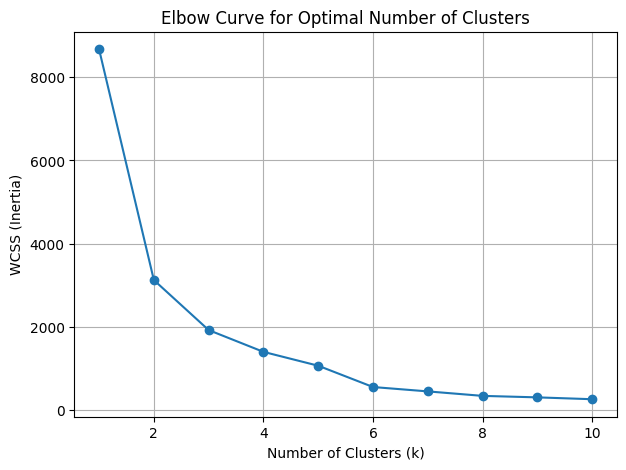

In [8]:
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Curve for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

In [16]:
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(features_scaled)

print("\nClustered Customer Data:")
print(customer_data.head())


Clustered Customer Data:
   CustomerID  TotalSpent  ItemsPurchased  Cluster
0     12346.0    77183.60           74215        1
1     12347.0     4310.00            2458        0
2     12348.0     1797.24            2341        0
3     12349.0     1757.55             631        0
4     12350.0      334.40             197        0


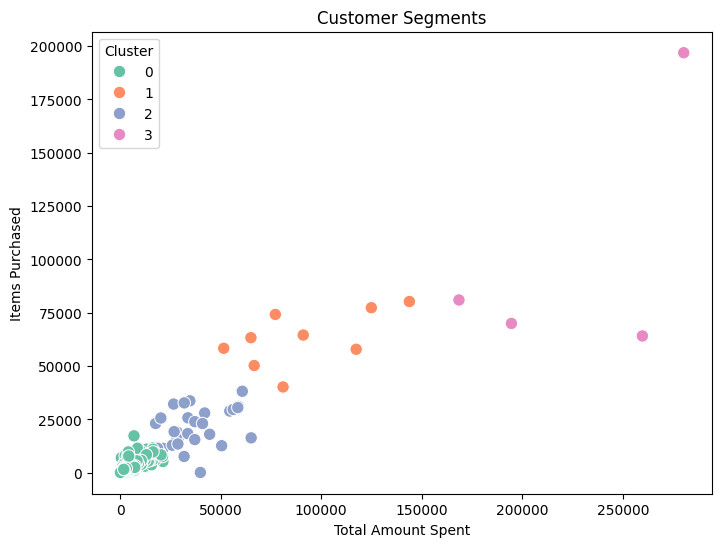


Cluster Summary:
             TotalSpent  ItemsPurchased
Cluster                               
0          1421.372927      832.030726
1         90956.724444    62934.000000
2         37368.713103    21205.965517
3        225721.652500   103007.250000


In [17]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='TotalSpent', 
    y='ItemsPurchased', 
    hue='Cluster',
    palette='Set2',
    data=customer_data,
    s=80
)
plt.title('Customer Segments')
plt.xlabel('Total Amount Spent')
plt.ylabel('Items Purchased')
plt.show()

cluster_summary = customer_data.groupby('Cluster')[['TotalSpent', 'ItemsPurchased']].mean()
print("\nCluster Summary:\n", cluster_summary)